# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 1
---



Ο στόχος της εργασίας είναι η εφαρμογή αλγορίθμμων αναζήτησης και εύρεσης καλύτερου μονοπατιού σε ένα τετραγωνικό grid διαστάσεων $N\times N$

Αρχικά, ο στόχος μας είναι η κατασκευή προβλημάτων αναζήτησης σε τετραγωνικές πίστες, όπου υπάρχει τουλάχιστον ένα μονοπάτι για τη μετάβαση από ένα αρχικό σημείο σε ένα στόχο.

In [0]:
# install latest matplotlib version
!pip install --upgrade matplotlib

     |████████████████████████████████| 13.1MB 186kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

class visualization:
    def __init__(self, S, F):
        self.S = S
        self.F = F
        self.images = []
    
    def draw_step(self, grid, frontier, expanded_nodes):
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
        image[grid.grid == 0] = [255, 255, 255]
        image[grid.grid == 1] = [0, 0, 0]
        
        for node in expanded_nodes:
            image[node] = [0, 0, 128]

        for node in frontier:
            image[node] = [0, 225, 0]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)
    
    def add_path(self, path):
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        
    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani
        
    def save_gif(self, filename, fps = 30):
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

## Μέρος Α: Κατασκευή χάρτη με διαφορετική πυκνότητα εμποδίων

In [0]:
%matplotlib inline
import numpy as np
from queue import LifoQueue
from random import shuffle, uniform
import matplotlib.pyplot as plt
import math


class grid:
    def __init__(self, N, S, F, p):
        
        ## Make sure start and end are within the grid
        assert N > 2
        assert S[0] < N
        assert S[1] < N
        assert F[0] < N
        assert F[1] < N

        assert S[0] > 0
        assert S[1] > 0
        assert F[0] > 0
        assert F[1] > 0

        self.N = N

        self.grid = np.zeros((N, N), dtype=np.int32)
        
        ### Surround the grid with obstacles
        self.grid[0, :] = 1
        self.grid[N - 1, :] = 1
        self.grid[:, 0] = 1
        self.grid[:, N - 1] = 1

        obstacle_free_points = {S, F}
        dfs_queue = LifoQueue()         

        ### Mark all the vertices as not visited 
        visited=np.zeros((N, N))

        ### Mark the source node as visited and enqueue it 
        dfs_queue.put(S) 
        visited[S[0]][S[1]] = 1

        n = S

        ### Ensure there is a path from S to F
        while (n!=F): 
          n = dfs_queue.get()
          adj=self.adjacent(n)
          ### Use shuffle, so that we can find a random path
          shuffle(adj)

          for i in adj: 
            if visited[i[0]][i[1]] == 0: 
              dfs_queue.put(i) 
              visited[i[0]][i[1]] = 1
              ### Create path
              obstacle_free_points.add(n)
          

        ### Fill the grid with obstacles. 
        for i in range(1,N-1):
          for j in range (1,N-1):
            if not ((i,j) in obstacle_free_points):
              if uniform(0, 1)>p:
                self.grid[i,j]=0
              else:
                self.grid[i,j]=1
              


    def adjacent(self, node):
        adjacent_nodes = []
        for n in (node[0] - 1, node[1]), (node[0] + 1, node[1]), (node[0], node[1] - 1), (node[0], node[1] + 1):
            if self.grid[n] == 0:
                adjacent_nodes.append(n)

        return adjacent_nodes

        

        

    def draw_map(self, S=None, F=None, path=None):

        image = np.zeros((self.N, self.N, 3), dtype=int)

        image[self.grid == 0] = [255, 255, 255]
        image[self.grid == 1] = [0, 0, 0]
        if S:
            image[S] = [50, 168, 64]
        if F:
            image[F] = [168, 50, 50]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.show()


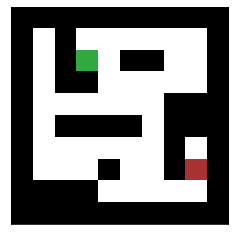

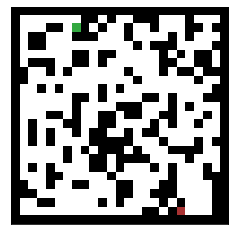

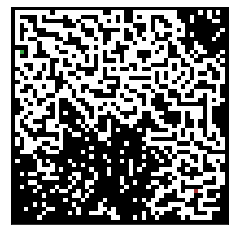

In [0]:
# show different grid sizes with different obstacle densities

for N, S, F, p in (10, (2, 3), (7, 8), .6), (25, (2, 7), (23, 19), .5), (50, (10, 2), (42, 42), .8):
    map = grid(N, S, F, p)
    map.draw_map(S, F)


## Μέρος Β: μελέτη επίδοσης αλγορίθμων pathfinding σε διαφορετικά είδη grids


---



Θεωρητικά
--




Παρακάτω χρησιμοποιούμε τον αλγόριθμο Α* με συνάρτηση κόστους:

f(n)=g(n)+h(n) 
 

*   Για g(n)=0  και  h(n)={manhattan(n),euclidean(n)}, προκύπτει ο αλγόριθμος αναζήτησης Best First, ο οποίος βρίσκει πάντα μονοπάτι, χωρίς όμως να εγγυάται ότι αυτό είναι το βέλτιστο.
* Για g(n)=1  και  h(n)=0, προκύπτει ο αλγόριθμος αναζήτησης Branch and Bound, ο οποίος βρίσκει τη βέλτιστη λύση.
* Για g(n)=1  και  h(n)={manhattan(n),euclidean(n)}, προκύπτει ο αλγόριθμος αναζήτησης Α*, ο οποίος μπορεί να βρει πάντα το βέλτιστο μονοπάτι.


 Άλλη ευριστική συνάρτηση εκτός από τις αποστάσεις manhattan και euclidean, είναι η Diagonal Distance, η οποία είναι το μέγιστο των απόλυτων διαφορών των συντεταγμένων του κόμβου n από τον κόμβο-στόχο:

 h(n) = max { abs(x – F[0]), abs(y – F[1]) } 

 Γενικότερα, αυτή η ευριστική συνάρτηση χρησιμοποιείται όταν μπορούμε να κινηθούμε μόνο προς τις 8 κατευθύνσεις.

Συμπέρασμα
--


---
Όταν λαμβάνεται υπόψην μόνο η ευριστική συνάρτηση, το μονοπάτι δεν είναι εγγυημένα το βέλτιστο. Αντίθετα, με την πραγματική απόσταση, η λύση είναι πάντα η βέλτιστη, με την πολυπλοκότητα του αλγορίθμου να μεταβάλλεται ανάλογα με το αν προσμετρούμε και την τιμή της ευριστικής ή όχι.


In [0]:
class pathfinder:
    def __init__(self, S, F, grid, c, h):
        self.S = S  ## S is the starting point - a tuple (x,y)
        self.F = F  ## F is the goal
        self.grid = grid ## A grid object (from A)
        self.vis = visualization(S, F)
        self.path = []
        self.cost = c
        self.heuristic = h
        self.frontier=[]            # μέτωπο αναζήτησης
        self.expanded_nodes=[]      # κλειστό σύνολο

 
        N=grid.N
        g = np.zeros((N, N))
        f = np.zeros((N, N))
        seen = []

        
        g[S[0]][S[1]] = 0              # For each node in frontier, keep g[n],h[n],f[n] and path_to_node[]
        path_to_node= [[S for i in range(N)] for j in range(N)]

        
        self.frontier.append(S)
        n=S
        
        self.vis.draw_step(self.grid, self.frontier, self.expanded_nodes)
          
        while n!=F: 
                   
            n = self.frontier[0]    
            self.frontier.remove(n)
            self.expanded_nodes.append(n)
            
            adj = grid.adjacent(n)
            for child in adj:
              # add in frontier and sort depending on f[child]
                
              if (child not in seen): 

                g[child[0]][child[1]] = c(child[0] , child[1]) + g[n[0]][n[1]]
                f[child[0]][child[1]] = g[child[0]][child[1]] + h(child[0] , child[1])  #calculate cost

                if n!=S:
                  path_to_node[child[0]][child[1]] = n

                #insert child node in sorted frontier
                index = len(self.frontier)
                for i in range(len(self.frontier)): 
                  nn = self.frontier[i]
                  if f[nn[0]][nn[1]] > f[child[0]][child[1]]: 
                      index = i 
                      break
                self.frontier = self.frontier[:index] + [child] + self.frontier[index:]
                seen.append(child) 
                self.vis.draw_step(self.grid, self.frontier, self.expanded_nodes)



        ### Fill the path list with the coordinates of each point in the path from S to F
        cur = F
        self.path.append(cur)
        while path_to_node[cur[0]][cur[1]] != S:
          cur = path_to_node[cur[0]][cur[1]]
          self.path.append(cur)
        self.path.append(path_to_node[cur[0]][cur[1]])
        self.path.reverse()
        self.vis.add_path(self.path)

    def get_path(self):
        return (self.path)

    def get_expanded_nodes(self):
        return (self.expanded_nodes)


Best First - manhattan


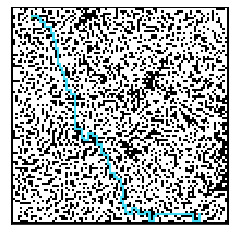

Best First - euclidean


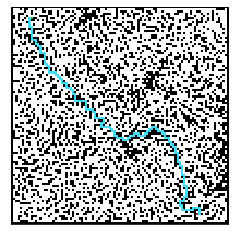

Best First - diagonal


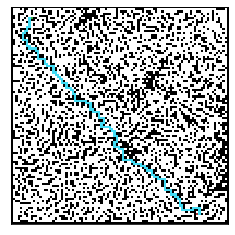

Branch and Bound


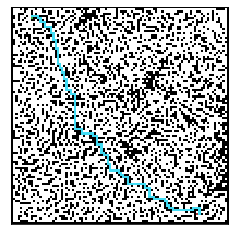

A* - manhattan


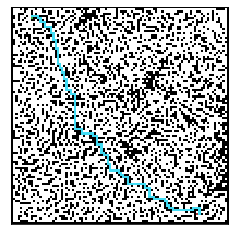

A* - euclidean


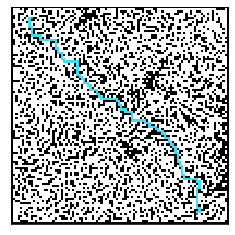

In [0]:
N = 100
S = (5, 9)
F = (95, 85)
p = .6

map = grid(N, S, F, p)

#g(n)=0 και h(n)={manhattan(n)}, Best First
print("Best First - manhattan")
pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: abs(x-F[0])+abs(y-F[0]))
map.draw_map(S, F, pf.get_path())


#g(n)=0 και h(n)={euclidean(n)}, Best First
print("Best First - euclidean")
pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: math.sqrt((x-F[0])**2+(y-F[1])**2))
map.draw_map(S, F, pf.get_path())

#g(n)=0 και h(n)={diagonal}, Best First
print("Best First - diagonal")
pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: max(abs(x-F[0]), abs(y-F[1])))
map.draw_map(S, F, pf.get_path())

# g(n)=1 και h(n)=0, Branch and Bound
print("Branch and Bound")
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
map.draw_map(S, F, pf.get_path())

# g(n)=1 και h(n)={manhattan(n)}, A*
print("A* - manhattan")
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: abs(x-F[0])+ abs(y-F[1]))
map.draw_map(S, F, pf.get_path())

# g(n)=1 και h(n)={euclidean(n)}, A*
print("A* - euclidean")
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: math.sqrt((x-F[1])**2+(y-F[1])**2))
map.draw_map(S, F, pf.get_path())









## Μέρος Γ: σύγκριση αλγορίθμων αναζήτησης (Ι)


---

Παρακάτω, υλοποιούνται οι αλγόριθμοι Best First, Branch and Bound και Α*.
Kατασκευάστηκαν χάρτες με σταθερή πιθανότητα ύπαρξης εμποδίου  p=0.5  και διάσταση  N=[10,20,…,100] . Για κάθε παραμετροποίηση κατασκευάστηκαν 100 διαφορετικοί χάρτες, στους οποίους εκτελέστηκαν οι παραπάνω αλγόριθμοι.

Συμπεράσματα
--
* Όπως φαίνεται στις παρακάτω γραφικές παραστάσεις, το βέλτιστο μονοπάτι επηρεάζεται, όπως είναι αναμενόμενο, από το μέγεθος του χάρτη και το μήκος του μεγαλώνει για μεγαλύτερα Ν, με τη σχέση των δύο μεγεθών να είναι σχεδόν γραμμική. Οι αλγόριθμοι Branch and Bound και A* έχουν την ίδια γραφική παράσταση μιας και οι δύο υπολογίζουν το βέλτιστο πονοπάτι, ενώ ο αλγόριθμος Best First βρίσκει λύση, η οποία δεν είναι βέλτιστη. Για μεγαλύτερα Ν, η λύση που υπολογίζει ο Best First έχει μεγαλύτερη διαφορά από το βέλτιστο μονοπάτι.

*   Για μεγαλύτερο μέγεθος χάρτη, η πολυπλοκότητα σχεδόν αυξάνεται εκθετικα, με τον αλγόριθμο Branch and Bound να παρουσιάζει τη μεγαλύτερη αύξηση, ενώ τον Best First να παραμένει σχεδόν σταθερός.



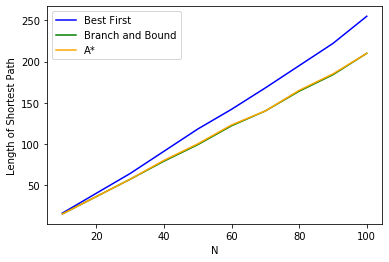

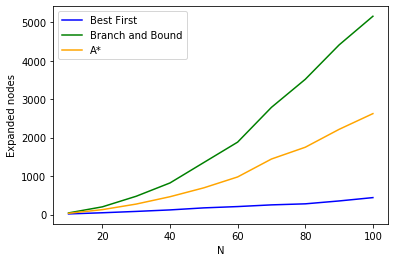

In [0]:
# N=[10,20,…,100], p = .5
shortest_path_length_alg1 = np.zeros(10, dtype = int) 
shortest_path_length_alg2 = np.zeros(10, dtype = int) 
shortest_path_length_alg3 = np.zeros(10, dtype = int) 

num_expanded_nodes_alg1 = np.zeros(10, dtype = int) 
num_expanded_nodes_alg2 = np.zeros(10, dtype = int) 
num_expanded_nodes_alg3 = np.zeros(10, dtype = int) 

N = 0
p = .5
S = (1,1)
for i in range (0,10):
  N = N + 10 
  F = (N-2,N-2)
  temp1 = 0
  temp2 = 0
  temp3 = 0

  temp11 = 0
  temp22 = 0
  temp33 = 0

  for j in range (0,100):  # 100 different maps
    map = grid(N, S, F, p) # εκτέλεση αλγορίθμων στους ίδιους χάρτες

    pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: abs(x-F[0])+abs(y-F[0]))  # Best First
    temp1 = temp1 + len(pf.get_path())/100
    temp11 = temp11 + len(pf.get_expanded_nodes())/100

    pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)      # Branch and Bound
    temp2 = temp2 + len(pf.get_path())/100
    temp22 = temp22 + len(pf.get_expanded_nodes())/100

    pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: abs(x-F[0])+ abs(y-F[1]))    # A*
    temp3 = temp3 + len(pf.get_path())/100
    temp33 = temp33 + len(pf.get_expanded_nodes())/100
  
  shortest_path_length_alg1[i] = temp1
  num_expanded_nodes_alg1[i] = temp11
  shortest_path_length_alg2[i] = temp2
  num_expanded_nodes_alg2[i] = temp22
  shortest_path_length_alg3[i] = temp3
  num_expanded_nodes_alg3[i] = temp33


x_axis = []
for i in range(10,110,10):
  x_axis.append(i)
y1_axis = []
y2_axis = []
y3_axis = []
for i in range (0,10): 
  y1_axis.append(shortest_path_length_alg1[i])
  y2_axis.append(shortest_path_length_alg2[i])
  y3_axis.append(shortest_path_length_alg3[i])

plt.plot(x_axis, y1_axis, label="Best First", color="blue")
plt.plot(x_axis, y2_axis, label="Branch and Bound", color="green")
plt.plot(x_axis, y3_axis, label="A*", color="orange")
plt.xlabel("N")
plt.ylabel("Length of Shortest Path")
plt.legend()
plt.show()

y1_axis = []
y2_axis = []
y3_axis = []
for i in range (0,10): 
  y1_axis.append(num_expanded_nodes_alg1[i])
  y2_axis.append(num_expanded_nodes_alg2[i])
  y3_axis.append(num_expanded_nodes_alg3[i])
plt.plot(x_axis, y1_axis, label="Best First", color="blue")
plt.plot(x_axis, y2_axis, label="Branch and Bound", color="green")
plt.plot(x_axis, y3_axis, label="A*", color="orange")
plt.xlabel("N")
plt.ylabel("Expanded nodes")
plt.legend()
plt.show()

## Μέρος Γ: σύγκριση αλγορίθμων αναζήτησης (ΙΙ)


---

Ομοίως, υλοποιούνται οι αλγόριθμοι Best First, Branch and Bound και Α*, για χάρτες με σταθερό μέγεθος  N=50  και πιθανότητα  p=[0,0.1,…,1].

Συμπεράσματα
--
*   Για μεγαλύτερη πυκνότητα εμποδίων, το μήκος του βέλτιστου μονοπατιού αυξάνεται εκθετικά, με τους Branch and Bound να έχουν την ίδια γραφική παράσταση αφού υπολογίζουν το βέλτιστο μονοπάτι, ενώ για μεγαλύτερες πυκνότητες εμποδίων, ο Best First πλησιάζει όλο και περισσότερο τη βέλτιστη λύση. Αυτό είναι αναμενόμενο, καθώς για μεγαλύτερες πυκνότητες εμποδίων, υπάρχουν λιγότερα εναλλακτικά μονοπάτια από τον κόμβο S προς τον F.
*   H πολυπλοκότητα των αλγορίθμων Branch and Bound και Α* μειώνεται με την αύξηση της πυκνότητας των εμποδίων, ενώ του Best First αυξάνεται. Όσο οι τιμές της πιθανότητας αυξάνονται, οι τιμές της πολυπλοκότητας των τριών αλγορίθμων έχουν όλο και μικρότερη διαφορά, μιας και για πυκνότερους χάρτες τα πιθανά μονοπάτια είναι λιγότερα και άρα και οι κόμβοι που επεκτείνονται - η πολυπλοκότητα των αλγορίθμων.





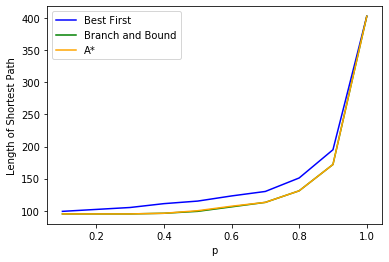

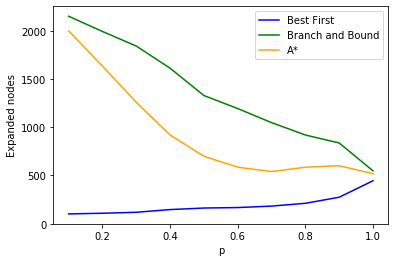

In [0]:
# N=50, p=[0,0.1,…,1]

shortest_path_length_alg1 = np.zeros(10, dtype = int) 
shortest_path_length_alg2 = np.zeros(10, dtype = int) 
shortest_path_length_alg3 = np.zeros(10, dtype = int) 

num_expanded_nodes_alg1 = np.zeros(10, dtype = int) 
num_expanded_nodes_alg2 = np.zeros(10, dtype = int) 
num_expanded_nodes_alg3 = np.zeros(10, dtype = int) 

N = 50
p = 0
S = (1,1)
F = (N-2,N-2)
for i in range (0,10):
  p = p + .1  
  temp1 = 0
  temp2 = 0
  temp3 = 0

  temp11 = 0
  temp22 = 0
  temp33 = 0
  for j in range (0,100):  # 100 different maps
    map = grid(N, S, F, p) # εκτέλεση αλγορίθμων στους ίδιους χάρτες

    pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: abs(x-F[0])+abs(y-F[0]))  # Best First
    temp1 = temp1 + len(pf.get_path())/100
    temp11 = temp11 + len(pf.get_expanded_nodes())/100

    pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)      # Branch and Bound
    temp2 = temp2 + len(pf.get_path())/100
    temp22 = temp22 + len(pf.get_expanded_nodes())/100

    pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: abs(x-F[0])+ abs(y-F[1]))    # A*
    temp3 = temp3 + len(pf.get_path())/100
    temp33 = temp33 + len(pf.get_expanded_nodes())/100

  shortest_path_length_alg1[i] = temp1
  num_expanded_nodes_alg1[i] = temp11
  shortest_path_length_alg2[i] = temp2
  num_expanded_nodes_alg2[i] = temp22
  shortest_path_length_alg3[i] = temp3
  num_expanded_nodes_alg3[i] = temp33


x_axis = []
t = .1
for i in range(0,10):
  x_axis.append(t)
  t = t + .1
y1_axis = []
y2_axis = []
y3_axis = []
for i in range (0,10):
  y1_axis.append(shortest_path_length_alg1[i])
  y2_axis.append(shortest_path_length_alg2[i])
  y3_axis.append(shortest_path_length_alg3[i])

plt.plot(x_axis, y1_axis, label="Best First", color="blue")
plt.plot(x_axis, y2_axis, label="Branch and Bound", color="green")
plt.plot(x_axis, y3_axis, label="A*", color="orange")
plt.xlabel("p")
plt.ylabel("Length of Shortest Path")
plt.legend()
plt.show()

y1_axis = []
y2_axis = []
y3_axis = []
for i in range (0,10): 
  y1_axis.append(num_expanded_nodes_alg1[i])
  y2_axis.append(num_expanded_nodes_alg2[i])
  y3_axis.append(num_expanded_nodes_alg3[i])
plt.plot(x_axis, y1_axis, label="Best First", color="blue")
plt.plot(x_axis, y2_axis, label="Branch and Bound", color="green")
plt.plot(x_axis, y3_axis, label="A*", color="orange")
plt.xlabel("p")
plt.ylabel("Expanded nodes")
plt.legend()
plt.show()

## Χρήσης της κλάσης Οπτικοποίησης

Visualization: 
--

Παρακάτω φαίνονται τα animation της αναζήτησης που υλοποιεί κάθε ένας από τους τρεις αλγορίθμους.

Παρατηρώντας το visualization, καταλήγουμε στα ίδια συμπεράσματα με την παραπάνω μελέτη, όσον αφορά την πολυπλοκότητα των αλγορίθμων, παρατηρώντας τους expanded nodes.

In [0]:
N = 70
S = (5, 9)
F = (65, 40)
p = .8

map = grid(N, S, F, p) 

#g(n)=0 και h(n)={manhattan(n)}, Best First
print("Best First - manhattan")
pf = pathfinder(S, F, map, lambda x, y: 0, lambda x, y: abs(x-F[0])+abs(y-F[0]))
pf.vis.show_gif(fps = 1)

Best First - manhattan


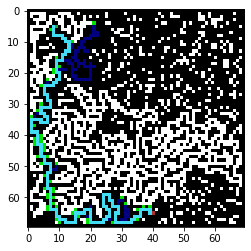

In [0]:
pf.vis.show_last_frame()

In [0]:
N= 10
S = (1, 2)
F = (4, 7)
p = .7

map = grid(N, S, F, p) 

# g(n)=1 και h(n)=0, Branch and Bound
print("Branch and Bound")
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: 0)
pf.vis.show_gif(fps = 1)

Branch and Bound


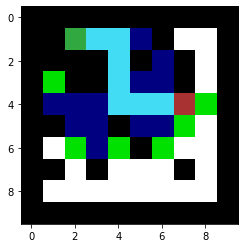

In [0]:
pf.vis.show_last_frame()

In [0]:
N = 20
S = (5, 9)
F = (15, 18)
p = .6


map = grid(N, S, F, p) 

# g(n)=1 και h(n)={manhattan(n)}, A*
print("A* - manhattan")
pf = pathfinder(S, F, map, lambda x, y: 1, lambda x, y: abs(x-F[0])+ abs(y-F[1]))
pf.vis.show_gif(fps = 1)

A* - manhattan


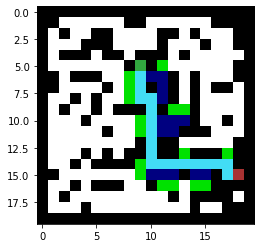

In [0]:
pf.vis.show_last_frame()